In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import random

There are a group of 7 islands that a politician wants to visit for campaigning. The politician wants to visit each island with probability in direct proportion to the island's population. The islands k = 1-7 have population equal to 1000*k.  Assume the politician starts off on island 4. He can either move left, right, or stay at the current island. He first flips a fair coin to decide whether to move left or right. The politician will move to an island with higher population with probability 1 but will move to a island with lower population with probability p = (lower population)/(current population). 

In [5]:
islands = {i:1000.0*i for i in range(1, 8, 1)}
islands

{1: 1000.0, 2: 2000.0, 3: 3000.0, 4: 4000.0, 5: 5000.0, 6: 6000.0, 7: 7000.0}

In [23]:
iterations = 1000000
left = {1:7, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6}
right = {1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:1}
def simulation(N):
    current = 4
    visits = {i:0.0 for i in range(1, 8, 1)}
    for i in xrange(N):
        coin = random.uniform(0.0, 1.0)
        if coin < 0.5:
            destination = left[current]
            if islands[destination] > islands[current]:
                current = destination
                visits[current] += 1
            else:
                target = islands[destination] / islands[current]
                coin = random.uniform(0.0, 1.0)
                if coin < target:
                    current = destination
                    visits[current] += 1
                else:
                    visits[current] += 1
        else:
            destination = right[current]
            if islands[destination] > islands[current]:
                current = destination
                visits[current] += 1
            else: 
                target = islands[destination] / islands[current]
                coin = random.uniform(0.0, 1.0)
                if coin < target:
                    current = destination
                    visits[current] += 1
                else:
                    visits[current] += 1
    probs = [visits[i] /N for i in visits.keys()]
    plt.bar(range(1, len(islands)+1, 1), probs, align="center")
    plt.xlabel("Island")
    plt.ylabel("Probability")
    plt.title("Island Random Walk")

With 1,000,000 iterations of the random walk can start to see clear differences in times spent in different states.

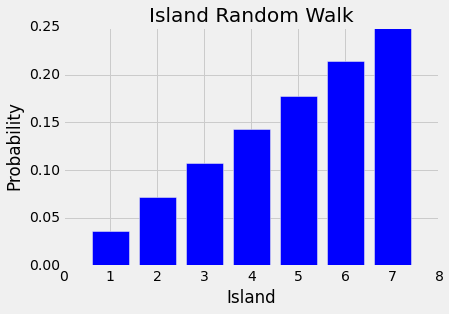

In [24]:
simulation(1000000)